In [10]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [36]:
genes = ["gene" + str(i) for i in range(1,101)]

wt = ["wt" + str(i) for i in range(1,6)]
ko = ["ko" + str(i) for i in range(1,6)]

In [37]:
data = pd.DataFrame(columns = [*wt,*ko], index = genes)

In [47]:
for gene in data.index:
    data.loc[gene,"wt1":"wt5"] = np.random.poisson(lam = rd.randrange(10,1000),
                                                    size = 5)
    data.loc[gene, "ko1":"ko5"] = np.random.poisson(lam = rd.randrange(10,1000),
                                                   size = 5)

In [48]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,869,918,854,847,845,823,901,874,874,912
gene2,405,409,386,397,347,50,41,37,53,56
gene3,14,14,19,12,15,297,311,310,300,299
gene4,30,24,37,30,26,672,631,632,592,673
gene5,422,390,421,365,370,256,257,244,265,254


In [49]:
data.shape

(100, 10)

In [50]:
#created a sample data 
scaled_data = preprocessing.scale(data.T)
#0 means and 1 variance

/home/mattia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [51]:
pca = PCA()#object that can be trained from sklearn 
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100,
                  decimals = 1)

labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

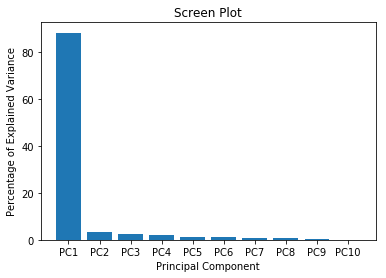

In [52]:
plt.bar(x = range(1,len(per_var)+1),
       height = per_var,
       tick_label = labels)

plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Screen Plot")
plt.show()

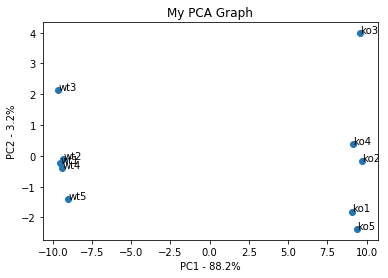

In [53]:
pca_df = pd.DataFrame(pca_data,
                     index = [*wt,*ko],
                     columns = labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample,
                (pca_df.PC1.loc[sample],
                pca_df.PC2.loc[sample]))
    
plt.show()

In [56]:
loading_scores = pd.Series(pca.components_[0],
                          index = genes)

sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

top_10_genes = sorted_loading_scores[0:10].index.values

loading_scores[top_10_genes]

gene3     0.106440
gene65   -0.106427
gene51    0.106421
gene16   -0.106420
gene24    0.106402
gene72    0.106402
gene55   -0.106387
gene67   -0.106381
gene95   -0.106363
gene35   -0.106350
dtype: float64